# data Collection

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_colwidth', 50)
df = pd.read_csv(r"C:\Users\Pratyush\Downloads\tc1.csv")

In [3]:
df

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution
0,2142,ER-Classification quality improvement,"Hi,\nfind attached one example of possible cle...",(1) Teamcenter,(7) Classification,Active,​Moved to DATA Streaming
1,2182,ER-STEP Type Dataset,Hi\nIs it possible to add a „new“ dataset type...,(1) Teamcenter,(1) TC services,Active,NaN
2,2229,ER-BOM REPORT ISSUES,"Hi Omar,\nI just discussed this with Vinay. Be...",(1) Teamcenter,(14) Configuration Changes,Active,NaN
3,2497,ER-VS: Vekt fra TC til SAP,"Hi,\nFind attached list of wheigths. How can w...",(1) Teamcenter,(1) TC services,Active,NaN
4,2508,ER-VS: Vekt fra TC til SAP,Data Stream,(1) Teamcenter,(1) TC services,Active,NaN
...,...,...,...,...,...,...,...
2893,1326,DC0201996 error,Error during approval. Please check and comple...,(1) Teamcenter,(1) TC services,Resolved,​1
2894,1334,DC0202059 error,One more similar error. Please check and compl...,(1) Teamcenter,(1) TC services,Resolved,​1
2895,1344,Type of error when saving BOM in tc,"When saving BOM in TC, I get this message:\nDo...",(1) Teamcenter,(1) TC services,Resolved,​1
2896,1346,URGENT!! CAD files of standard parts,Can you please create CAD parts off the follow...,(1) Teamcenter,(1) TC services,Resolved,1


In [4]:
len(df[df["Category"]=="(1) Teamcenter"])


2749

In [5]:
df['Title'].nunique()

2565

In [6]:
#newdf = pd.DataFrame(np.repeat(df.values,3,axis=0))
#newdf.columns = df.columns
#df=newdf


# data cleaning

In [7]:
 df.isnull().sum()

IssueID          0
Title            0
Description      2
Category         0
Sub-Category     0
IssueStatus      0
Resolution      74
dtype: int64

In [8]:
df["Description"].fillna("No Description", inplace = True)
df["Resolution"].fillna("No Resolution", inplace = True)
df

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution
0,2142,ER-Classification quality improvement,"Hi,\nfind attached one example of possible cle...",(1) Teamcenter,(7) Classification,Active,​Moved to DATA Streaming
1,2182,ER-STEP Type Dataset,Hi\nIs it possible to add a „new“ dataset type...,(1) Teamcenter,(1) TC services,Active,No Resolution
2,2229,ER-BOM REPORT ISSUES,"Hi Omar,\nI just discussed this with Vinay. Be...",(1) Teamcenter,(14) Configuration Changes,Active,No Resolution
3,2497,ER-VS: Vekt fra TC til SAP,"Hi,\nFind attached list of wheigths. How can w...",(1) Teamcenter,(1) TC services,Active,No Resolution
4,2508,ER-VS: Vekt fra TC til SAP,Data Stream,(1) Teamcenter,(1) TC services,Active,No Resolution
...,...,...,...,...,...,...,...
2893,1326,DC0201996 error,Error during approval. Please check and comple...,(1) Teamcenter,(1) TC services,Resolved,​1
2894,1334,DC0202059 error,One more similar error. Please check and compl...,(1) Teamcenter,(1) TC services,Resolved,​1
2895,1344,Type of error when saving BOM in tc,"When saving BOM in TC, I get this message:\nDo...",(1) Teamcenter,(1) TC services,Resolved,​1
2896,1346,URGENT!! CAD files of standard parts,Can you please create CAD parts off the follow...,(1) Teamcenter,(1) TC services,Resolved,1


In [9]:
df.isnull().sum()

IssueID         0
Title           0
Description     0
Category        0
Sub-Category    0
IssueStatus     0
Resolution      0
dtype: int64

In [10]:
# remove punctuations
import string
string.punctuation

def remove_punctuation(txt):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

In [11]:
#df['Descprition'] = df['Description'].apply(lambda x: remove_punctuation(x))
df['Title'] = df['Title'].apply(lambda x: remove_punctuation(x))
df['Description'] = df['Description'].apply(lambda x: remove_punctuation(x))
df['Category'] = df['Category'].apply(lambda x: remove_punctuation(x))
df['Sub-Category'] = df['Sub-Category'].apply(lambda x: remove_punctuation(x))
df['IssueStatus'] = df['IssueStatus'].apply(lambda x: remove_punctuation(x))
df['Resolution'] = df['Resolution'].apply(lambda x: remove_punctuation(x))


df.head()

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution
0,2142,ERClassification quality improvement,Hi\nfind attached one example of possible clea...,1 Teamcenter,7 Classification,Active,​Moved to DATA Streaming
1,2182,ERSTEP Type Dataset,Hi\nIs it possible to add a „new“ dataset type...,1 Teamcenter,1 TC services,Active,No Resolution
2,2229,ERBOM REPORT ISSUES,Hi Omar\nI just discussed this with Vinay Belo...,1 Teamcenter,14 Configuration Changes,Active,No Resolution
3,2497,ERVS Vekt fra TC til SAP,Hi\nFind attached list of wheigths How can we ...,1 Teamcenter,1 TC services,Active,No Resolution
4,2508,ERVS Vekt fra TC til SAP,Data Stream,1 Teamcenter,1 TC services,Active,No Resolution


In [12]:
#tokenization

import re

def tokenize(txt):
    tokens = re.split('\W+', txt)
    return tokens

df['Title'] = df['Title'].apply(lambda x: tokenize(x))
df['Description'] = df['Description'].apply(lambda x: tokenize(x))
df['Category'] = df['Category'].apply(lambda x: tokenize(x))
df['Sub-Category'] = df['Sub-Category'].apply(lambda x: tokenize(x))
df['IssueStatus'] = df['IssueStatus'].apply(lambda x: tokenize(x))
df['Resolution'] = df['Resolution'].apply(lambda x: tokenize(x))



df.head()

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution
0,2142,"[ERClassification, quality, improvement]","[Hi, find, attached, one, example, of, possibl...","[1, Teamcenter]","[7, Classification]",[Active],"[, Moved, to, DATA, Streaming]"
1,2182,"[ERSTEP, Type, Dataset]","[Hi, Is, it, possible, to, add, a, new, datase...","[1, Teamcenter]","[1, TC, services]",[Active],"[No, Resolution]"
2,2229,"[ERBOM, REPORT, ISSUES]","[Hi, Omar, I, just, discussed, this, with, Vin...","[1, Teamcenter]","[14, Configuration, Changes]",[Active],"[No, Resolution]"
3,2497,"[ERVS, Vekt, fra, TC, til, SAP]","[Hi, Find, attached, list, of, wheigths, How, ...","[1, Teamcenter]","[1, TC, services]",[Active],"[No, Resolution]"
4,2508,"[ERVS, Vekt, fra, TC, til, SAP]","[Data, Stream]","[1, Teamcenter]","[1, TC, services]",[Active],"[No, Resolution]"


In [13]:
#stopwords
import nltk
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

df['Title'] = df['Title'].apply(lambda x: remove_stopwords(x))
df['Description'] = df['Description'].apply(lambda x: remove_stopwords(x))
df['Category'] = df['Category'].apply(lambda x: remove_stopwords(x))
df['Sub-Category'] = df['Sub-Category'].apply(lambda x: remove_stopwords(x))
df['IssueStatus'] = df['IssueStatus'].apply(lambda x: remove_stopwords(x))
df['Resolution'] = df['Resolution'].apply(lambda x: remove_stopwords(x))

df.head()


,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution
0,2142,"[ERClassification, quality, improvement]","[Hi, find, attached, one, example, possible, c...","[1, Teamcenter]","[7, Classification]",[Active],"[, Moved, DATA, Streaming]"
1,2182,"[ERSTEP, Type, Dataset]","[Hi, Is, possible, add, new, dataset, type, li...","[1, Teamcenter]","[1, TC, services]",[Active],"[No, Resolution]"
2,2229,"[ERBOM, REPORT, ISSUES]","[Hi, Omar, I, discussed, Vinay, Below, fix, is...","[1, Teamcenter]","[14, Configuration, Changes]",[Active],"[No, Resolution]"
3,2497,"[ERVS, Vekt, fra, TC, til, SAP]","[Hi, Find, attached, list, wheigths, How, auto...","[1, Teamcenter]","[1, TC, services]",[Active],"[No, Resolution]"
4,2508,"[ERVS, Vekt, fra, TC, til, SAP]","[Data, Stream]","[1, Teamcenter]","[1, TC, services]",[Active],"[No, Resolution]"


In [14]:
#stemming(reducing derrived words to their root words)

#import nltk 
#from nltk.stem import PorterStemmer
#ps = PorterStemmer()

#def stemming(tokenized_text):
 #   text = [ps.stem(word) for word in tokenized_text]
  #  return text

#df['Title'] = df['Title'].apply(lambda x: stemming(x))
#df['Description'] = df['Description'].apply(lambda x: stemming(x))
#df['Category'] = df['Category'].apply(lambda x: stemming(x))
#df['SubCategory'] = df['SubCategory'].apply(lambda x: stemming(x))
#df['IssueStatus'] = df['IssueStatus'].apply(lambda x: stemming(x))
#df['Resolution'] = df['Resolution'].apply(lambda x: stemming(x))

#df.head()

In [15]:
#lemmatization(more accurate than stemming)
import nltk
wn = nltk.WordNetLemmatizer()
#ps = nltk.PorterStemmer()



In [16]:
def lemmatization(token_txt):
    text = [wn.lemmatize(word, pos='v') for word in token_txt]
    return text

df['Title'] = df['Title'].apply(lambda x: lemmatization(x))
df['Description'] = df['Description'].apply(lambda x: lemmatization(x))
df['Category'] = df['Category'].apply(lambda x: lemmatization(x))
df['Sub-Category'] = df['Sub-Category'].apply(lambda x: lemmatization(x))
df['IssueStatus'] = df['IssueStatus'].apply(lambda x: lemmatization(x))
df['Resolution'] = df['Resolution'].apply(lambda x: lemmatization(x))

df


,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution
0,2142,"[ERClassification, quality, improvement]","[Hi, find, attach, one, example, possible, cle...","[1, Teamcenter]","[7, Classification]",[Active],"[, Moved, DATA, Streaming]"
1,2182,"[ERSTEP, Type, Dataset]","[Hi, Is, possible, add, new, dataset, type, li...","[1, Teamcenter]","[1, TC, service]",[Active],"[No, Resolution]"
2,2229,"[ERBOM, REPORT, ISSUES]","[Hi, Omar, I, discuss, Vinay, Below, fix, issu...","[1, Teamcenter]","[14, Configuration, Changes]",[Active],"[No, Resolution]"
3,2497,"[ERVS, Vekt, fra, TC, til, SAP]","[Hi, Find, attach, list, wheigths, How, automa...","[1, Teamcenter]","[1, TC, service]",[Active],"[No, Resolution]"
4,2508,"[ERVS, Vekt, fra, TC, til, SAP]","[Data, Stream]","[1, Teamcenter]","[1, TC, service]",[Active],"[No, Resolution]"
...,...,...,...,...,...,...,...
2893,1326,"[DC0201996, error]","[Error, approval, Please, check, complete, Wha...","[1, Teamcenter]","[1, TC, service]",[Resolved],"[, 1]"
2894,1334,"[DC0202059, error]","[One, similar, error, Please, check, complete]","[1, Teamcenter]","[1, TC, service]",[Resolved],"[, 1]"
2895,1344,"[Type, error, save, BOM, tc]","[When, save, BOM, TC, I, get, message, Does, s...","[1, Teamcenter]","[1, TC, service]",[Resolved],"[, 1]"
2896,1346,"[URGENT, CAD, file, standard, part]","[Can, please, create, CAD, part, follow, part,...","[1, Teamcenter]","[1, TC, service]",[Resolved],[1]


In [17]:
import re
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer = lemmatization)

X = cv.fit_transform(df['Title'])
print(X.shape)

(2898, 3473)


In [18]:
print(cv.get_feature_names())

['', '000384', '004333', '01', '0180', '0181', '01810182', '02', '03102019', '046117', '069', '093603Classification', '1', '100', '10010', '100BSS', '108', '1080', '109', '11', '11024', '1110', '111324086', '111324586', '111325086', '111339986', '111366786', '111372786', '111387186', '111410786', '111438786', '111445786', '111455486', '111455586', '111465086', '111485586', '111570786', '11161', '111663586', '11pdf', '12', '12400', '12408', '12410', '12412', '129', '13287', '13288', '14008', '14016', '14016C1111011758BOMREPORT15062018103146xlsx', '14519', '1454447', '150', '155', '161017HRSLong', '1641927', '1641927317130urgent', '1642829', '1643036', '16430C1111008173BOMREPORT18022019130245xlsx', '17047', '1729495Engine', '17297', '17297319', '17318', '1732024', '17326', '1732728', '17333', '17345', '1734651', '177', '180', '18014', '180418', '181', '19002100', '1950203', '2', '200028622', '200031838', '200041391200030783', '201117', '20170914Tegnuts', '20181127', '204828B', '21122019'

# converting data into machine lang(Data Vectorization)

In [19]:
df_sample = df
cv1 = CountVectorizer(analyzer = lemmatization)

Xc = cv1.fit_transform(df_sample['Title'])

print(X.shape)

(2898, 3473)


In [20]:
df1 = pd.DataFrame(Xc.toarray(), columns=cv1.get_feature_names())
df1

,,000384,004333,01,0180,0181,01810182,02,03102019,046117,...,yet,Ø100,Ø10x1,Ø10x15,Ø381,Ø95,å,åpne,åpnes,åpning
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#df_sample1 = df
#cv2 = CountVectorizer(analyzer = lemmatization)

Y = cv1.fit_transform(df_sample['Description'])


print(Y.shape)

(2898, 8640)


In [22]:
df2 = pd.DataFrame(Y.toarray(), columns=cv1.get_feature_names())
df2

,,0,000,0001,00045139,00054760600,000567,001977,00441733,00444037,...,ær,ø10x1,ø12,ø16x45,ø17A4,ø186,ø305,ø32,ø321mm,ø90
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2895,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2896,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#df_sample2 = df
#cv3 = CountVectorizer(analyzer = lemmatization)

Z = cv1.fit_transform(df_sample['Category'])


print(Z.shape)


(2898, 12)


In [24]:
df3 = pd.DataFrame(Z.toarray(), columns=cv1.get_feature_names())
df3

,1,10,2,3,5,Corrections,Data,Errros,NX,T4S,Teamcenter,User
0,1,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2893,1,0,0,0,0,0,0,0,0,0,1,0
2894,1,0,0,0,0,0,0,0,0,0,1,0
2895,1,0,0,0,0,0,0,0,0,0,1,0
2896,1,0,0,0,0,0,0,0,0,0,1,0


In [25]:
#df_sample3 = df
#cv4 = CountVectorizer(analyzer = lemmatization)

A = cv1.fit_transform(df_sample['Sub-Category'])


print(A.shape)


(2898, 54)


In [26]:
df4 = pd.DataFrame(A.toarray(), columns=cv1.get_feature_names())
df4

,1,11,12,13,14,15,16,17,18,2,...,Network,Others,Ownership,Report,Request,TC,Upload,Workflow,issue,service
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2894,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2895,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2896,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [27]:
#df_sample4 = df
#cv5 = CountVectorizer(analyzer = lemmatization)

B = cv1.fit_transform(df_sample['IssueStatus'])


print(B.shape)


(2898, 3)


In [28]:
df5 = pd.DataFrame(B.toarray(), columns=cv1.get_feature_names())
df5

,Active,Closed,Resolved
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
2893,0,0,1
2894,0,0,1
2895,0,0,1
2896,0,0,1


In [29]:
#df_sample5 = df
#cv6 = CountVectorizer(analyzer = lemmatization)

C = cv1.fit_transform(df_sample['Resolution'])


print(C.shape)


(2898, 5676)


In [30]:
df6 = pd.DataFrame(C.toarray(), columns=cv1.get_feature_names())
df6

,,0,0019,00BC2693,01,01012100,011,011m,0180,018001810182,...,àAs,àCXSS00704023,àChanged,àEnd,àFor,àGAdrawing,àOwnership,àRight,àUser,àWe
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2894,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2895,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
def lemmatization1(token_txt):
    text = " ".join([wn.lemmatize(word, pos='v') for word in token_txt])
    return text

df['Title'] = df['Title'].apply(lambda x: lemmatization1(x))
df['Description'] = df['Description'].apply(lambda x: lemmatization1(x))
df['Category'] = df['Category'].apply(lambda x: lemmatization1(x))
df['Sub-Category'] = df['Sub-Category'].apply(lambda x: lemmatization1(x))
df['IssueStatus'] = df['IssueStatus'].apply(lambda x: lemmatization1(x))
df['Resolution'] = df['Resolution'].apply(lambda x: lemmatization1(x))

df


,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution
0,2142,ERClassification quality improvement,Hi find attach one example possible cleanups n...,1 Teamcenter,7 Classification,Active,Moved DATA Streaming
1,2182,ERSTEP Type Dataset,Hi Is possible add new dataset type list Teamc...,1 Teamcenter,1 TC service,Active,No Resolution
2,2229,ERBOM REPORT ISSUES,Hi Omar I discuss Vinay Below fix issue In Str...,1 Teamcenter,14 Configuration Changes,Active,No Resolution
3,2497,ERVS Vekt fra TC til SAP,Hi Find attach list wheigths How automate uplo...,1 Teamcenter,1 TC service,Active,No Resolution
4,2508,ERVS Vekt fra TC til SAP,Data Stream,1 Teamcenter,1 TC service,Active,No Resolution
...,...,...,...,...,...,...,...
2893,1326,DC0201996 error,Error approval Please check complete What reas...,1 Teamcenter,1 TC service,Resolved,1
2894,1334,DC0202059 error,One similar error Please check complete,1 Teamcenter,1 TC service,Resolved,1
2895,1344,Type error save BOM tc,When save BOM TC I get message Does something ...,1 Teamcenter,1 TC service,Resolved,1
2896,1346,URGENT CAD file standard part,Can please create CAD part follow part C111101...,1 Teamcenter,1 TC service,Resolved,1


# Frequency of issues

In [32]:
corpus = df['Title']
corpus

0       ERClassification quality improvement
1                        ERSTEP Type Dataset
2                        ERBOM REPORT ISSUES
3                   ERVS Vekt fra TC til SAP
4                   ERVS Vekt fra TC til SAP
                        ...                 
2893                         DC0201996 error
2894                         DC0202059 error
2895                  Type error save BOM tc
2896           URGENT CAD file standard part
2897     Search Legacy Items give noe result
Name: Title, Length: 2898, dtype: object

In [33]:
stopwords = nltk.corpus.stopwords.words('english')
stop_words = stopwords


In [34]:
df_sample = df
cv1 = CountVectorizer(max_df=0.8, max_features=10000, stop_words=stop_words, ngram_range=(1,3))

D = cv1.fit_transform(df_sample['Title'])
m=list(cv.vocabulary_.keys())[:10]

#print(D.shape)


In [35]:
#df7 = pd.DataFrame(D.toarray(), columns=cv1.get_feature_names())
#df7



In [36]:
from nltk.probability import FreqDist
fdist = FreqDist(corpus)
print(fdist)

<FreqDist with 2529 samples and 2898 outcomes>


In [37]:
fdist.most_common(1000)

[('Release item', 30),
 ('Rename CXSS', 21),
 ('Release material', 20),
 ('Renaming', 16),
 ('High', 14),
 ('My Teamcenter Teamcenter 8', 10),
 ('Rename W', 10),
 ('Release materials', 10),
 ('3D bolt', 8),
 ('Release issue', 7),
 ('TC error', 7),
 ('Unrelease', 7),
 ('Create CXSS', 7),
 ('Release item SAP', 6),
 ('New items Need 3D model', 6),
 ('MRB generation', 6),
 ('Rename', 5),
 ('Error message', 5),
 ('unrelease', 5),
 ('My Teamcenter Teamcenter 11', 5),
 ('New standard part', 5),
 ('Help make CXSS', 5),
 ('Release Material', 4),
 ('Please release SAP', 4),
 ('New items Need 3D model change material', 4),
 ('BOM report Teamcenter', 4),
 ('ERTC issue', 3),
 ('Error release', 3),
 ('REVISE', 3),
 ('Wrong classification', 3),
 ('Ownership', 3),
 ('316250 2201112 HHI MSC P158 Revision Plant Spec C1111006808', 3),
 ('change ownership', 3),
 ('Release material SAP', 3),
 ('Unrelease item', 3),
 ('BCs SAP', 3),
 ('Renaming CXSS', 3),
 ('rename', 3),
 ('Delete item revision', 3),
 ('Reg

In [38]:
fdist.tabulate(3)

    Release item      Rename CXSS Release material 
              30               21               20 


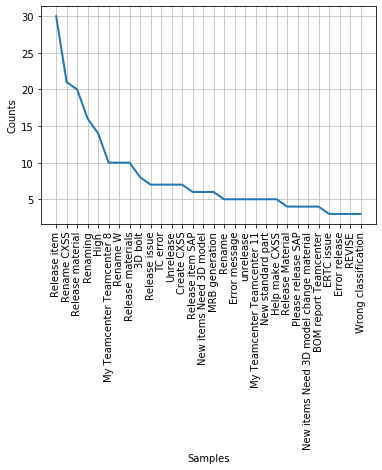

In [39]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

                        Keyword  Frequency
0      approved bom release sap         21
1             new items need 3d         11
2           items need 3d model         11
3       vs approved bom release         11
4        bergen engines as prod         10
5              nx85 nx setup 27          6
6            nx setup 27 bergen          6
7       setup 27 bergen engines          6
8          27 bergen engines as          6
9        316250 2201112 hhi msc          6
10         2201112 hhi msc p158          6
11  my teamcenter teamcenter 11          6
12         need 3d model change          5
13     3d model change material          5
14      approve vs approved bom          5
15    generate pdf mrb dc006358          5
16    generate pdf mrb dc006452          5
17        rreb 317090 eng 12408          4
18    317090 eng 12408 c2533l6a          4
19    eng 12408 c2533l6a fitjar          4


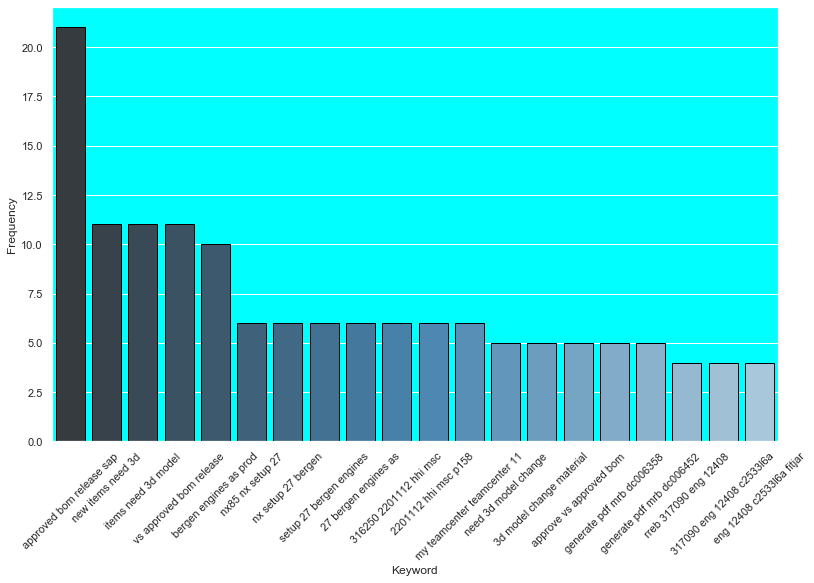

In [40]:
import pandas
fwords=["please",'to',"hi","hello","on"]
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(4,4),  
            max_features=2000).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    words_freq=[i for i in words_freq if i not in fwords ]
    return words_freq[:n]


# Convert most freq words to dataframe for plotting bar plot, save as CSV
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Keyword", "Frequency"]
print(top_df)
#top_df.to_csv(file_prefix + '_top_words.csv')

# Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Keyword", y="Frequency", data=top_df, palette="Blues_d", edgecolor = 'black')
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_facecolor('cyan')
#g.figure.savefig(file_prefix + "_keyword.png", bbox_inches = "tight")

In [41]:
df

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution
0,2142,ERClassification quality improvement,Hi find attach one example possible cleanups n...,1 Teamcenter,7 Classification,Active,Moved DATA Streaming
1,2182,ERSTEP Type Dataset,Hi Is possible add new dataset type list Teamc...,1 Teamcenter,1 TC service,Active,No Resolution
2,2229,ERBOM REPORT ISSUES,Hi Omar I discuss Vinay Below fix issue In Str...,1 Teamcenter,14 Configuration Changes,Active,No Resolution
3,2497,ERVS Vekt fra TC til SAP,Hi Find attach list wheigths How automate uplo...,1 Teamcenter,1 TC service,Active,No Resolution
4,2508,ERVS Vekt fra TC til SAP,Data Stream,1 Teamcenter,1 TC service,Active,No Resolution
...,...,...,...,...,...,...,...
2893,1326,DC0201996 error,Error approval Please check complete What reas...,1 Teamcenter,1 TC service,Resolved,1
2894,1334,DC0202059 error,One similar error Please check complete,1 Teamcenter,1 TC service,Resolved,1
2895,1344,Type error save BOM tc,When save BOM TC I get message Does something ...,1 Teamcenter,1 TC service,Resolved,1
2896,1346,URGENT CAD file standard part,Can please create CAD part follow part C111101...,1 Teamcenter,1 TC service,Resolved,1


In [42]:
#from sklearn.feature_extraction.text import CountVectorizer
#count_vect = CountVectorizer()
#X_train_counts = count_vect.fit_transform(df_sample['Title'])
#X_train_counts

In [43]:
#from sklearn.feature_extraction.text import TfidfTransformer
#tfidf_transformer = TfidfTransformer()
#X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#X_train_tfidf.shape

# Categorization

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

In [45]:
#Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['Title'],df['Category'],test_size=0.3)
df

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution
0,2142,ERClassification quality improvement,Hi find attach one example possible cleanups n...,1 Teamcenter,7 Classification,Active,Moved DATA Streaming
1,2182,ERSTEP Type Dataset,Hi Is possible add new dataset type list Teamc...,1 Teamcenter,1 TC service,Active,No Resolution
2,2229,ERBOM REPORT ISSUES,Hi Omar I discuss Vinay Below fix issue In Str...,1 Teamcenter,14 Configuration Changes,Active,No Resolution
3,2497,ERVS Vekt fra TC til SAP,Hi Find attach list wheigths How automate uplo...,1 Teamcenter,1 TC service,Active,No Resolution
4,2508,ERVS Vekt fra TC til SAP,Data Stream,1 Teamcenter,1 TC service,Active,No Resolution
...,...,...,...,...,...,...,...
2893,1326,DC0201996 error,Error approval Please check complete What reas...,1 Teamcenter,1 TC service,Resolved,1
2894,1334,DC0202059 error,One similar error Please check complete,1 Teamcenter,1 TC service,Resolved,1
2895,1344,Type error save BOM tc,When save BOM TC I get message Does something ...,1 Teamcenter,1 TC service,Resolved,1
2896,1346,URGENT CAD file standard part,Can please create CAD part follow part C111101...,1 Teamcenter,1 TC service,Resolved,1


# Title


In [46]:
df['Title'].dropna(inplace=True)
#  Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
from nltk.tokenize import word_tokenize


df['Title'] = [entry.lower() for entry in df['Title']]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
df['Title']= [word_tokenize(entry) for entry in df['Title']]
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun

from nltk.corpus import wordnet as wn
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV


In [47]:
from nltk import pos_tag
for index,entry in enumerate(df['Title']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    df.loc[index,'text_final'] = str(Final_words)
    
df
df.fillna(value=' ', inplace=True)
df

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution,text_final
0,2142,"[erclassification, quality, improvement]",Hi find attach one example possible cleanups n...,1 Teamcenter,7 Classification,Active,Moved DATA Streaming,"['erclassification', 'quality', 'improvement']"
1,2182,"[erstep, type, dataset]",Hi Is possible add new dataset type list Teamc...,1 Teamcenter,1 TC service,Active,No Resolution,"['erstep', 'type', 'dataset']"
2,2229,"[erbom, report, issues]",Hi Omar I discuss Vinay Below fix issue In Str...,1 Teamcenter,14 Configuration Changes,Active,No Resolution,"['erbom', 'report', 'issue']"
3,2497,"[ervs, vekt, fra, tc, til, sap]",Hi Find attach list wheigths How automate uplo...,1 Teamcenter,1 TC service,Active,No Resolution,"['ervs', 'vekt', 'fra', 'tc', 'til', 'sap']"
4,2508,"[ervs, vekt, fra, tc, til, sap]",Data Stream,1 Teamcenter,1 TC service,Active,No Resolution,"['ervs', 'vekt', 'fra', 'tc', 'til', 'sap']"
...,...,...,...,...,...,...,...,...
2893,1326,"[dc0201996, error]",Error approval Please check complete What reas...,1 Teamcenter,1 TC service,Resolved,1,['error']
2894,1334,"[dc0202059, error]",One similar error Please check complete,1 Teamcenter,1 TC service,Resolved,1,['error']
2895,1344,"[type, error, save, bom, tc]",When save BOM TC I get message Does something ...,1 Teamcenter,1 TC service,Resolved,1,"['type', 'error', 'save', 'bom', 'tc']"
2896,1346,"[urgent, cad, file, standard, part]",Can please create CAD part follow part C111101...,1 Teamcenter,1 TC service,Resolved,1,"['urgent', 'cad', 'file', 'standard', 'part']"


In [48]:
z1 = []
for i in df['text_final']:
    k = ' '
    for j in i:
        if j.isalpha() or j== " ":
            k+=j
    z1.append(k)
df["text_final"]=z1
df

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution,text_final
0,2142,"[erclassification, quality, improvement]",Hi find attach one example possible cleanups n...,1 Teamcenter,7 Classification,Active,Moved DATA Streaming,erclassification quality improvement
1,2182,"[erstep, type, dataset]",Hi Is possible add new dataset type list Teamc...,1 Teamcenter,1 TC service,Active,No Resolution,erstep type dataset
2,2229,"[erbom, report, issues]",Hi Omar I discuss Vinay Below fix issue In Str...,1 Teamcenter,14 Configuration Changes,Active,No Resolution,erbom report issue
3,2497,"[ervs, vekt, fra, tc, til, sap]",Hi Find attach list wheigths How automate uplo...,1 Teamcenter,1 TC service,Active,No Resolution,ervs vekt fra tc til sap
4,2508,"[ervs, vekt, fra, tc, til, sap]",Data Stream,1 Teamcenter,1 TC service,Active,No Resolution,ervs vekt fra tc til sap
...,...,...,...,...,...,...,...,...
2893,1326,"[dc0201996, error]",Error approval Please check complete What reas...,1 Teamcenter,1 TC service,Resolved,1,error
2894,1334,"[dc0202059, error]",One similar error Please check complete,1 Teamcenter,1 TC service,Resolved,1,error
2895,1344,"[type, error, save, bom, tc]",When save BOM TC I get message Does something ...,1 Teamcenter,1 TC service,Resolved,1,type error save bom tc
2896,1346,"[urgent, cad, file, standard, part]",Can please create CAD part follow part C111101...,1 Teamcenter,1 TC service,Resolved,1,urgent cad file standard part


# Description


In [49]:
df['Description'].dropna(inplace=True)
#  Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
from nltk.tokenize import word_tokenize


df['Description'] = [entry.lower() for entry in df['Description']]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
df['Description']= [word_tokenize(entry) for entry in df['Description']]
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun

from nltk.corpus import wordnet as wn
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV


In [50]:
from nltk import pos_tag
for index,entry in enumerate(df['Description']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    df.loc[index,'desc_final'] = str(Final_words)
    
df
df.fillna(value=' ', inplace=True)
df

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution,text_final,desc_final
0,2142,"[erclassification, quality, improvement]","[hi, find, attach, one, example, possible, cle...",1 Teamcenter,7 Classification,Active,Moved DATA Streaming,erclassification quality improvement,"['hi', 'find', 'attach', 'one', 'example', 'po..."
1,2182,"[erstep, type, dataset]","[hi, is, possible, add, new, dataset, type, li...",1 Teamcenter,1 TC service,Active,No Resolution,erstep type dataset,"['hi', 'possible', 'add', 'new', 'dataset', 't..."
2,2229,"[erbom, report, issues]","[hi, omar, i, discuss, vinay, below, fix, issu...",1 Teamcenter,14 Configuration Changes,Active,No Resolution,erbom report issue,"['hi', 'omar', 'discuss', 'vinay', 'fix', 'iss..."
3,2497,"[ervs, vekt, fra, tc, til, sap]","[hi, find, attach, list, wheigths, how, automa...",1 Teamcenter,1 TC service,Active,No Resolution,ervs vekt fra tc til sap,"['hi', 'find', 'attach', 'list', 'wheigths', '..."
4,2508,"[ervs, vekt, fra, tc, til, sap]","[data, stream]",1 Teamcenter,1 TC service,Active,No Resolution,ervs vekt fra tc til sap,"['data', 'stream']"
...,...,...,...,...,...,...,...,...,...
2893,1326,"[dc0201996, error]","[error, approval, please, check, complete, wha...",1 Teamcenter,1 TC service,Resolved,1,error,"['error', 'approval', 'please', 'check', 'comp..."
2894,1334,"[dc0202059, error]","[one, similar, error, please, check, complete]",1 Teamcenter,1 TC service,Resolved,1,error,"['one', 'similar', 'error', 'please', 'check',..."
2895,1344,"[type, error, save, bom, tc]","[when, save, bom, tc, i, get, message, does, s...",1 Teamcenter,1 TC service,Resolved,1,type error save bom tc,"['save', 'bom', 'tc', 'get', 'message', 'somet..."
2896,1346,"[urgent, cad, file, standard, part]","[can, please, create, cad, part, follow, part,...",1 Teamcenter,1 TC service,Resolved,1,urgent cad file standard part,"['please', 'create', 'cad', 'part', 'follow', ..."


In [51]:
z2 = []
for i in df['desc_final']:
    k = ' '
    for j in i:
        if j.isalpha() or j== " ":
            k+=j
    z2.append(k)
df["desc_final"]=z2
df

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution,text_final,desc_final
0,2142,"[erclassification, quality, improvement]","[hi, find, attach, one, example, possible, cle...",1 Teamcenter,7 Classification,Active,Moved DATA Streaming,erclassification quality improvement,hi find attach one example possible cleanup n...
1,2182,"[erstep, type, dataset]","[hi, is, possible, add, new, dataset, type, li...",1 Teamcenter,1 TC service,Active,No Resolution,erstep type dataset,hi possible add new dataset type list teamcen...
2,2229,"[erbom, report, issues]","[hi, omar, i, discuss, vinay, below, fix, issu...",1 Teamcenter,14 Configuration Changes,Active,No Resolution,erbom report issue,hi omar discuss vinay fix issue structure man...
3,2497,"[ervs, vekt, fra, tc, til, sap]","[hi, find, attach, list, wheigths, how, automa...",1 Teamcenter,1 TC service,Active,No Resolution,ervs vekt fra tc til sap,hi find attach list wheigths automate upload ...
4,2508,"[ervs, vekt, fra, tc, til, sap]","[data, stream]",1 Teamcenter,1 TC service,Active,No Resolution,ervs vekt fra tc til sap,data stream
...,...,...,...,...,...,...,...,...,...
2893,1326,"[dc0201996, error]","[error, approval, please, check, complete, wha...",1 Teamcenter,1 TC service,Resolved,1,error,error approval please check complete reason e...
2894,1334,"[dc0202059, error]","[one, similar, error, please, check, complete]",1 Teamcenter,1 TC service,Resolved,1,error,one similar error please check complete
2895,1344,"[type, error, save, bom, tc]","[when, save, bom, tc, i, get, message, does, s...",1 Teamcenter,1 TC service,Resolved,1,type error save bom tc,save bom tc get message something error relea...
2896,1346,"[urgent, cad, file, standard, part]","[can, please, create, cad, part, follow, part,...",1 Teamcenter,1 TC service,Resolved,1,urgent cad file standard part,please create cad part follow part standard f...


In [52]:
re_col=[]
for i,j in zip(df["desc_final"],df["text_final"]):
    k=i
    k+=j
    re_col.append(k)
df["final"]=re_col

In [53]:
#df = df.reindex(columns=['text_final', 'Description', 'SubCategory'])
df

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution,text_final,desc_final,final
0,2142,"[erclassification, quality, improvement]","[hi, find, attach, one, example, possible, cle...",1 Teamcenter,7 Classification,Active,Moved DATA Streaming,erclassification quality improvement,hi find attach one example possible cleanup n...,hi find attach one example possible cleanup n...
1,2182,"[erstep, type, dataset]","[hi, is, possible, add, new, dataset, type, li...",1 Teamcenter,1 TC service,Active,No Resolution,erstep type dataset,hi possible add new dataset type list teamcen...,hi possible add new dataset type list teamcen...
2,2229,"[erbom, report, issues]","[hi, omar, i, discuss, vinay, below, fix, issu...",1 Teamcenter,14 Configuration Changes,Active,No Resolution,erbom report issue,hi omar discuss vinay fix issue structure man...,hi omar discuss vinay fix issue structure man...
3,2497,"[ervs, vekt, fra, tc, til, sap]","[hi, find, attach, list, wheigths, how, automa...",1 Teamcenter,1 TC service,Active,No Resolution,ervs vekt fra tc til sap,hi find attach list wheigths automate upload ...,hi find attach list wheigths automate upload ...
4,2508,"[ervs, vekt, fra, tc, til, sap]","[data, stream]",1 Teamcenter,1 TC service,Active,No Resolution,ervs vekt fra tc til sap,data stream,data stream ervs vekt fra tc til sap
...,...,...,...,...,...,...,...,...,...,...
2893,1326,"[dc0201996, error]","[error, approval, please, check, complete, wha...",1 Teamcenter,1 TC service,Resolved,1,error,error approval please check complete reason e...,error approval please check complete reason e...
2894,1334,"[dc0202059, error]","[one, similar, error, please, check, complete]",1 Teamcenter,1 TC service,Resolved,1,error,one similar error please check complete,one similar error please check complete error
2895,1344,"[type, error, save, bom, tc]","[when, save, bom, tc, i, get, message, does, s...",1 Teamcenter,1 TC service,Resolved,1,type error save bom tc,save bom tc get message something error relea...,save bom tc get message something error relea...
2896,1346,"[urgent, cad, file, standard, part]","[can, please, create, cad, part, follow, part,...",1 Teamcenter,1 TC service,Resolved,1,urgent cad file standard part,please create cad part follow part standard f...,please create cad part follow part standard f...


In [54]:
df["Title"][0]

['erclassification', 'quality', 'improvement']

In [55]:
#df.columns[:-1]
#df.columns[2:3]
df.dtypes

IssueID          int64
Title           object
Description     object
Category        object
Sub-Category    object
IssueStatus     object
Resolution      object
text_final      object
desc_final      object
final           object
dtype: object

In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier


# Divide high and low frequency

In [57]:
k=df["Sub-Category"].unique()

In [58]:
low_fr=[]
hi_fr=[]
for i in k:
    if df[df["Sub-Category"]==i].shape[0]>=50:
        hi_fr.append(i)
    else:
        low_fr.append(i)

In [59]:
grouped = df.groupby(df["Sub-Category"])
df_new=None
for i in hi_fr:
    df_1= grouped.get_group(i)
    df_new=pd.concat([df_1,df_new])
df_new["Sub-Category"].unique()

array(['8 Attribute Change', '12 Data Creation Request',
       '6 BOM Management', '5 Workflow issue', '3 Admin Issues', '18 NX',
       '14 Configuration Changes', '1 TC service', '7 Classification'],
      dtype=object)

In [60]:
df_low=None
for i in low_fr:
    df_2= grouped.get_group(i)
    df_low=pd.concat([df_2,df_low])
df_low["Sub-Category"].unique()

array(['13 Code Changes', '17 TC FMS', '22 Network',
       '15 LOP CreateUpdate', '20 ERP Report Issue', '16 IPS Upload',
       '4 Ownership issue', '9 Login', '2 Installation', '11 BMIDE',
       '21 TC Extract', '23 Others'], dtype=object)

In [61]:


df_yelp =df_new["final"]
sentences = df_yelp.values
y = df_new['Sub-Category']



#df_yelp =df[df.columns[:-1]]
#X1 = df_yelp.values
#y = df["Category"]
#print("featurre", X.head())
#X1_train, X1_test, y_train, y_test = train_test_split(sentences, y, test_size=0.20, random_state=0)

In [62]:
set(df["Sub-Category"])

{'1 TC service',
 '11 BMIDE',
 '12 Data Creation Request',
 '13 Code Changes',
 '14 Configuration Changes',
 '15 LOP CreateUpdate',
 '16 IPS Upload',
 '17 TC FMS',
 '18 NX',
 '2 Installation',
 '20 ERP Report Issue',
 '21 TC Extract',
 '22 Network',
 '23 Others',
 '3 Admin Issues',
 '4 Ownership issue',
 '5 Workflow issue',
 '6 BOM Management',
 '7 Classification',
 '8 Attribute Change',
 '9 Login'}

In [63]:
sentences2=[sentences,df_new["Category"]]


In [64]:
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.20, random_state=0)

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

In [66]:
X_test

<545x3559 sparse matrix of type '<class 'numpy.int64'>'
	with 6172 stored elements in Compressed Sparse Row format>

In [67]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train, y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test)
# Use accuracy_score function to get the accuracy
SVM1 = print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)
SVM1

SVM Accuracy Score ->  66.23853211009174


In [114]:
Input=["hi find attach one example possible cleanup n", 'erstep type dataset','quick release error message', 'please get these items released and sent to SAP']
vectorizer2 = CountVectorizer()
vectorizer2.fit(Input)
k2=vectorizer.transform(Input)
SVM.predict(k2)

array(['18 NX', '1 TC service', '1 TC service', '1 TC service'],
      dtype=object)

In [69]:
co=0
to=0
for i,j in zip(predictions_SVM,y_test):
    to+=1
    if i!=j:
        co+=1
        print(i,j)

3 Admin Issues 6 BOM Management
1 TC service 18 NX
3 Admin Issues 1 TC service
8 Attribute Change 3 Admin Issues
3 Admin Issues 14 Configuration Changes
3 Admin Issues 1 TC service
1 TC service 6 BOM Management
1 TC service 5 Workflow issue
1 TC service 3 Admin Issues
1 TC service 3 Admin Issues
8 Attribute Change 3 Admin Issues
8 Attribute Change 7 Classification
1 TC service 6 BOM Management
1 TC service 3 Admin Issues
8 Attribute Change 3 Admin Issues
3 Admin Issues 8 Attribute Change
1 TC service 14 Configuration Changes
7 Classification 1 TC service
1 TC service 3 Admin Issues
1 TC service 6 BOM Management
6 BOM Management 1 TC service
7 Classification 1 TC service
6 BOM Management 12 Data Creation Request
1 TC service 5 Workflow issue
1 TC service 6 BOM Management
3 Admin Issues 1 TC service
6 BOM Management 3 Admin Issues
3 Admin Issues 8 Attribute Change
8 Attribute Change 3 Admin Issues
1 TC service 6 BOM Management
5 Workflow issue 1 TC service
8 Attribute Change 1 TC service

In [70]:

to,co

(545, 184)

In [71]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train, y_train)
predictions_NB = Naive.predict(X_test)
# Use accuracy_score function to get the accuracy
NB = print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)
NB

Naive Bayes Accuracy Score ->  65.87155963302752


In [72]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = (classifier.score(X_test, y_test)*100)
LR = print("Logistic Regression Accuracy Score->", score)
LR

Logistic Regression Accuracy Score-> 68.9908256880734


C:\Users\Pratyush\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [73]:
len(df[df["Sub-Category"]=="1 TC service"])


1560

In [74]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)
# Fit the classifier to the data
knn.fit(X_train,y_train)
knn.score(X_test,y_test)
knn.predict(X_test)[:40]

array(['1 TC service', '1 TC service', '1 TC service', '1 TC service',
       '1 TC service', '1 TC service', '3 Admin Issues', '1 TC service',
       '1 TC service', '1 TC service', '1 TC service', '1 TC service',
       '1 TC service', '1 TC service', '1 TC service', '6 BOM Management',
       '1 TC service', '1 TC service', '3 Admin Issues',
       '5 Workflow issue', '3 Admin Issues', '1 TC service',
       '1 TC service', '1 TC service', '1 TC service', '5 Workflow issue',
       '3 Admin Issues', '1 TC service', '1 TC service', '18 NX',
       '1 TC service', '1 TC service', '1 TC service', '1 TC service',
       '1 TC service', '1 TC service', '1 TC service', '1 TC service',
       '5 Workflow issue', '1 TC service'], dtype=object)

In [75]:
Input=['erclassification quality improvement', 'erstep type dataset','quick release error message', 'please get these items released and sent to SAP']
vectorizer2 = CountVectorizer()
vectorizer2.fit(Input)
k2=vectorizer.transform(Input)
knn.predict(k2)

array(['5 Workflow issue', '5 Workflow issue', '1 TC service',
       '1 TC service'], dtype=object)

In [76]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(max_depth= 500)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred1 = clf2.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1)*100)

Accuracy: 60.0


In [77]:
y_pred1

array(['1 TC service', '6 BOM Management', '6 BOM Management',
       '1 TC service', '1 TC service', '1 TC service', '3 Admin Issues',
       '6 BOM Management', '1 TC service', '1 TC service',
       '3 Admin Issues', '1 TC service', '1 TC service',
       '14 Configuration Changes', '5 Workflow issue', '6 BOM Management',
       '1 TC service', '1 TC service', '8 Attribute Change',
       '5 Workflow issue', '3 Admin Issues', '1 TC service',
       '1 TC service', '8 Attribute Change', '1 TC service',
       '3 Admin Issues', '1 TC service', '1 TC service', '1 TC service',
       '18 NX', '1 TC service', '1 TC service', '1 TC service',
       '1 TC service', '1 TC service', '1 TC service',
       '8 Attribute Change', '1 TC service', '7 Classification',
       '1 TC service', '1 TC service', '1 TC service', '1 TC service',
       '1 TC service', '5 Workflow issue', '1 TC service',
       '6 BOM Management', '1 TC service', '1 TC service',
       '8 Attribute Change', '6 BOM Manageme

# RNN

In [78]:
shu_df=df_new.sample(frac=1)

df_yelp =shu_df["final"]
sentences = df_yelp.values
y = shu_df['Sub-Category']

In [79]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
layers = keras.layers
models = keras.models


# This code was tested with TensorFlow v1.8
print("You have TensorFlow version", tf.__version__)

You have TensorFlow version 2.3.0


In [80]:
train_size = int(len(shu_df) * .8)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(shu_df) - train_size))

Train size: 2180
Test size: 545


In [81]:
def train_test_split(data, train_size):
    train = data[:train_size]
    test = data[train_size:]
    return train, test
train_cat, test_cat = train_test_split(y, train_size)
train_text, test_text = train_test_split(df_yelp, train_size)

In [82]:
max_words = 1000
tokenize = keras.preprocessing.text.Tokenizer(num_words=max_words, 
                                              char_level=False)

In [83]:
tokenize.fit_on_texts(train_text) # fit tokenizer to our training text data
x_train = tokenize.texts_to_matrix(train_text)
x_test = tokenize.texts_to_matrix(test_text)

In [84]:
encoder = LabelEncoder()
encoder.fit(train_cat)
y_train = encoder.transform(train_cat)
y_test = encoder.transform(test_cat)
# Converts the labels to a one-hot representation


In [85]:
train_cat

621         1 TC service
1636      3 Admin Issues
760         1 TC service
2744      3 Admin Issues
2024    6 BOM Management
              ...       
2162    7 Classification
2667        1 TC service
1754      3 Admin Issues
978         1 TC service
814         1 TC service
Name: Sub-Category, Length: 2180, dtype: object

In [86]:
num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
# Inspect the dimenstions of our training and test data (this is helpful to debug)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (2180, 1000)
x_test shape: (545, 1000)
y_train shape: (2180, 9)
y_test shape: (545, 9)


In [87]:
batch_size = 32
epochs = 20
drop_ratio = 0.1
model = models.Sequential()
model.add(layers.Dense(512, input_shape=(max_words,)))
model.add(layers.Activation('relu'))
# model.add(layers.Dropout(drop_ratio))
model.add(layers.Dense(num_classes))
model.add(layers.Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model.fit trains the model
# The validation_split param tells Keras what % of our training data should be used in the validation set
# You can see the validation loss decreasing slowly when you run this
# Because val_loss is no longer decreasing we stop training to prevent overfitting
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/20
62/62 [==============================] - 1s 11ms/step - loss: 1.5385 - accuracy: 0.5637 - val_loss: 1.2487 - val_accuracy: 0.6330
Epoch 2/20
62/62 [==============================] - 0s 6ms/step - loss: 0.9345 - accuracy: 0.7085 - val_loss: 0.9818 - val_accuracy: 0.7064
Epoch 3/20
62/62 [==============================] - 0s 6ms/step - loss: 0.6213 - accuracy: 0.8033 - val_loss: 0.9015 - val_accuracy: 0.7202
Epoch 4/20
62/62 [==============================] - 0s 6ms/step - loss: 0.4493 - accuracy: 0.8578 - val_loss: 0.9008 - val_accuracy: 0.7385
Epoch 5/20
62/62 [==============================] - 0s 6ms/step - loss: 0.3425 - accuracy: 0.9001 - val_loss: 0.9140 - val_accuracy: 0.7294
Epoch 6/20
62/62 [==============================] - 0s 6ms/step - loss: 0.2728 - accuracy: 0.9230 - val_loss: 0.9555 - val_accuracy: 0.7294
Epoch 7/20
62/62 [==============================] - 0s 6ms/step - loss: 0.2275 - accuracy: 0.9373 - val_loss: 0.9984 - val_accuracy: 0.7110
Epoch 8/20
62/62 [=

In [88]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

18/18 [==============================] - 0s 2ms/step - loss: 1.4455 - accuracy: 0.7083
Test loss: 1.4454511404037476
Test accuracy: 0.7082569003105164


In [89]:
def run_experiment(batch_size, epochs, drop_ratio):
  print('batch size: {}, epochs: {}, drop_ratio: {}'.format(
      batch_size, epochs, drop_ratio))
  model = models.Sequential()
  model.add(layers.Dense(512, input_shape=(max_words,)))
  model.add(layers.Activation('relu'))
  model.add(layers.Dropout(drop_ratio))
  model.add(layers.Dense(num_classes))
  model.add(layers.Activation('softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_split=0.1)
  score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=0)
  print('\tTest loss:', score[0])
  print('\tTest accuracy:', score[1])

In [90]:
batch_size = 16
epochs = 10
drop_ratio = 0.1
run_experiment(batch_size, epochs, drop_ratio)

batch size: 16, epochs: 10, drop_ratio: 0.1
	Test loss: 1.2513103485107422
	Test accuracy: 0.721100926399231


In [91]:
text_labels = encoder.classes_ 
co=0
for i in range(40):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_text.iloc[i][:50], "...")
    print('Actual label:' + test_cat.iloc[i])
    print("Predicted label: " + predicted_label + "\n") 
    if test_cat.iloc[i]!=predicted_label:
        co+=1
print(co)

 hi please add reference item create cad part ...
Actual label:3 Admin Issues
Predicted label: 18 NX

 please release follow cxss send sap release cxsss ...
Actual label:1 TC service
Predicted label: 1 TC service

 quantity bom cyl engine tc sap tc bom correct rai ...
Actual label:1 TC service
Predicted label: 1 TC service

 hi please generate pdf generate pdf mrb ...
Actual label:14 Configuration Changes
Predicted label: 14 Configuration Changes

 please release item sap release item ...
Actual label:1 TC service
Predicted label: 1 TC service

 error approval could please check complete proces ...
Actual label:1 TC service
Predicted label: 1 TC service

 regard plant specification rev c could please del ...
Actual label:1 TC service
Predicted label: 3 Admin Issues

 item miss model adaptorredr add model item adapto ...
Actual label:18 NX
Predicted label: 18 NX

 need assistance figure something wrong part shall ...
Actual label:1 TC service
Predicted label: 1 TC service

 hi please re

In [92]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [93]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

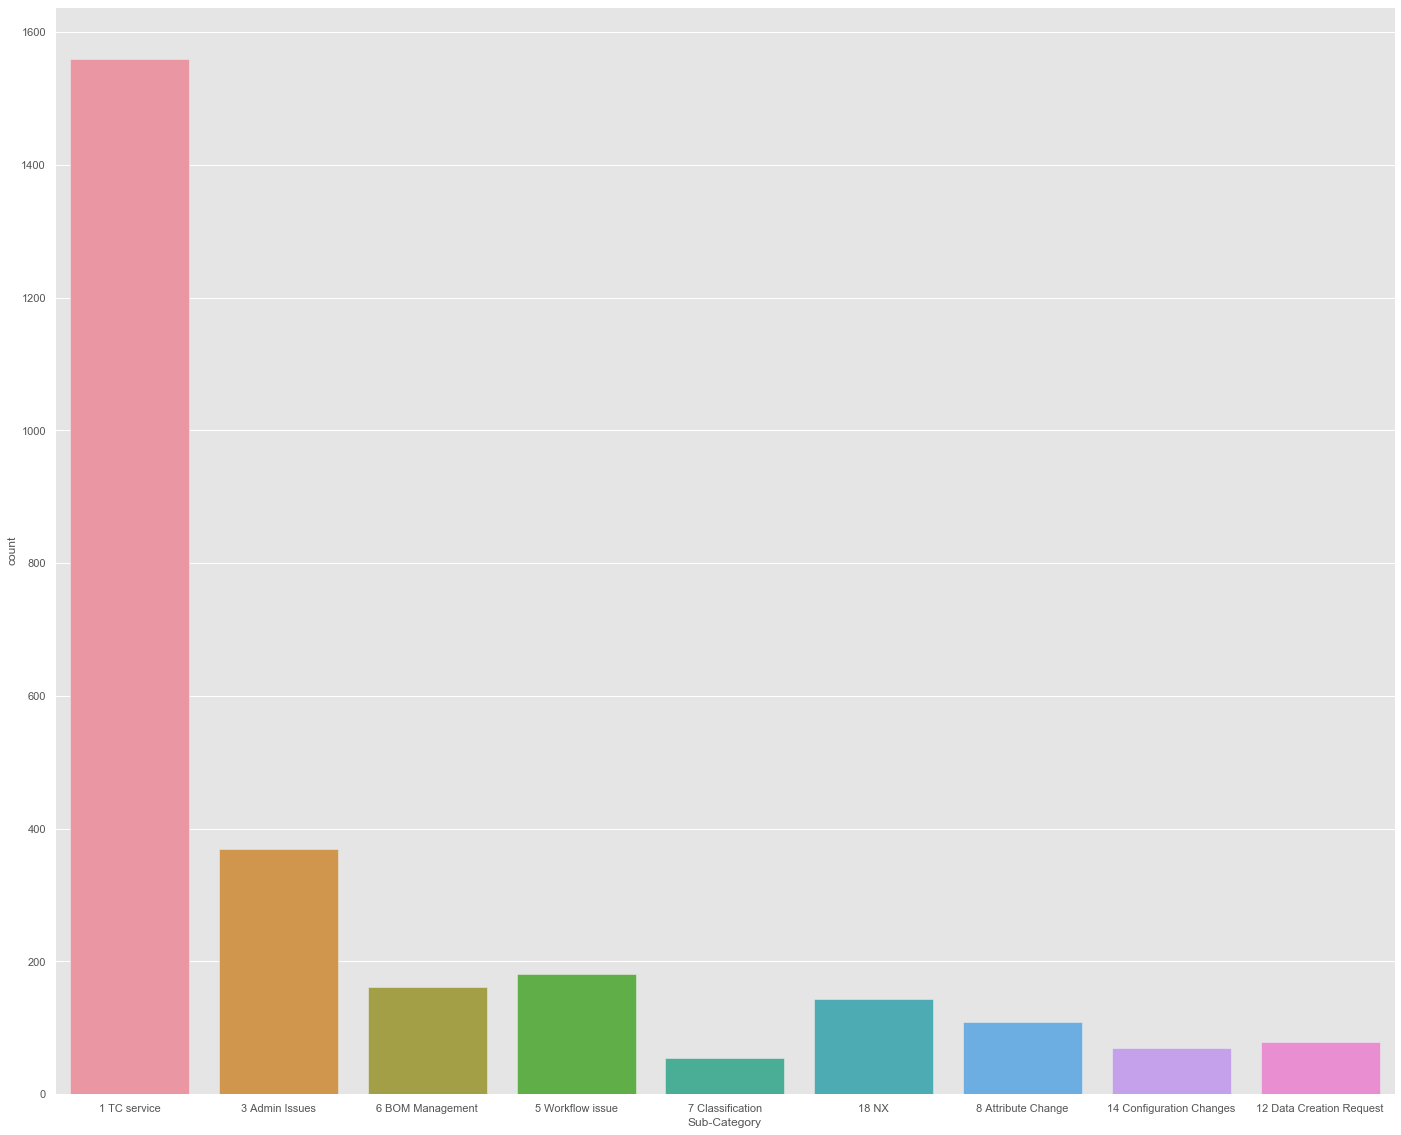

In [94]:

plt.figure(figsize=(24,20))
sns.countplot(shu_df["Sub-Category"])

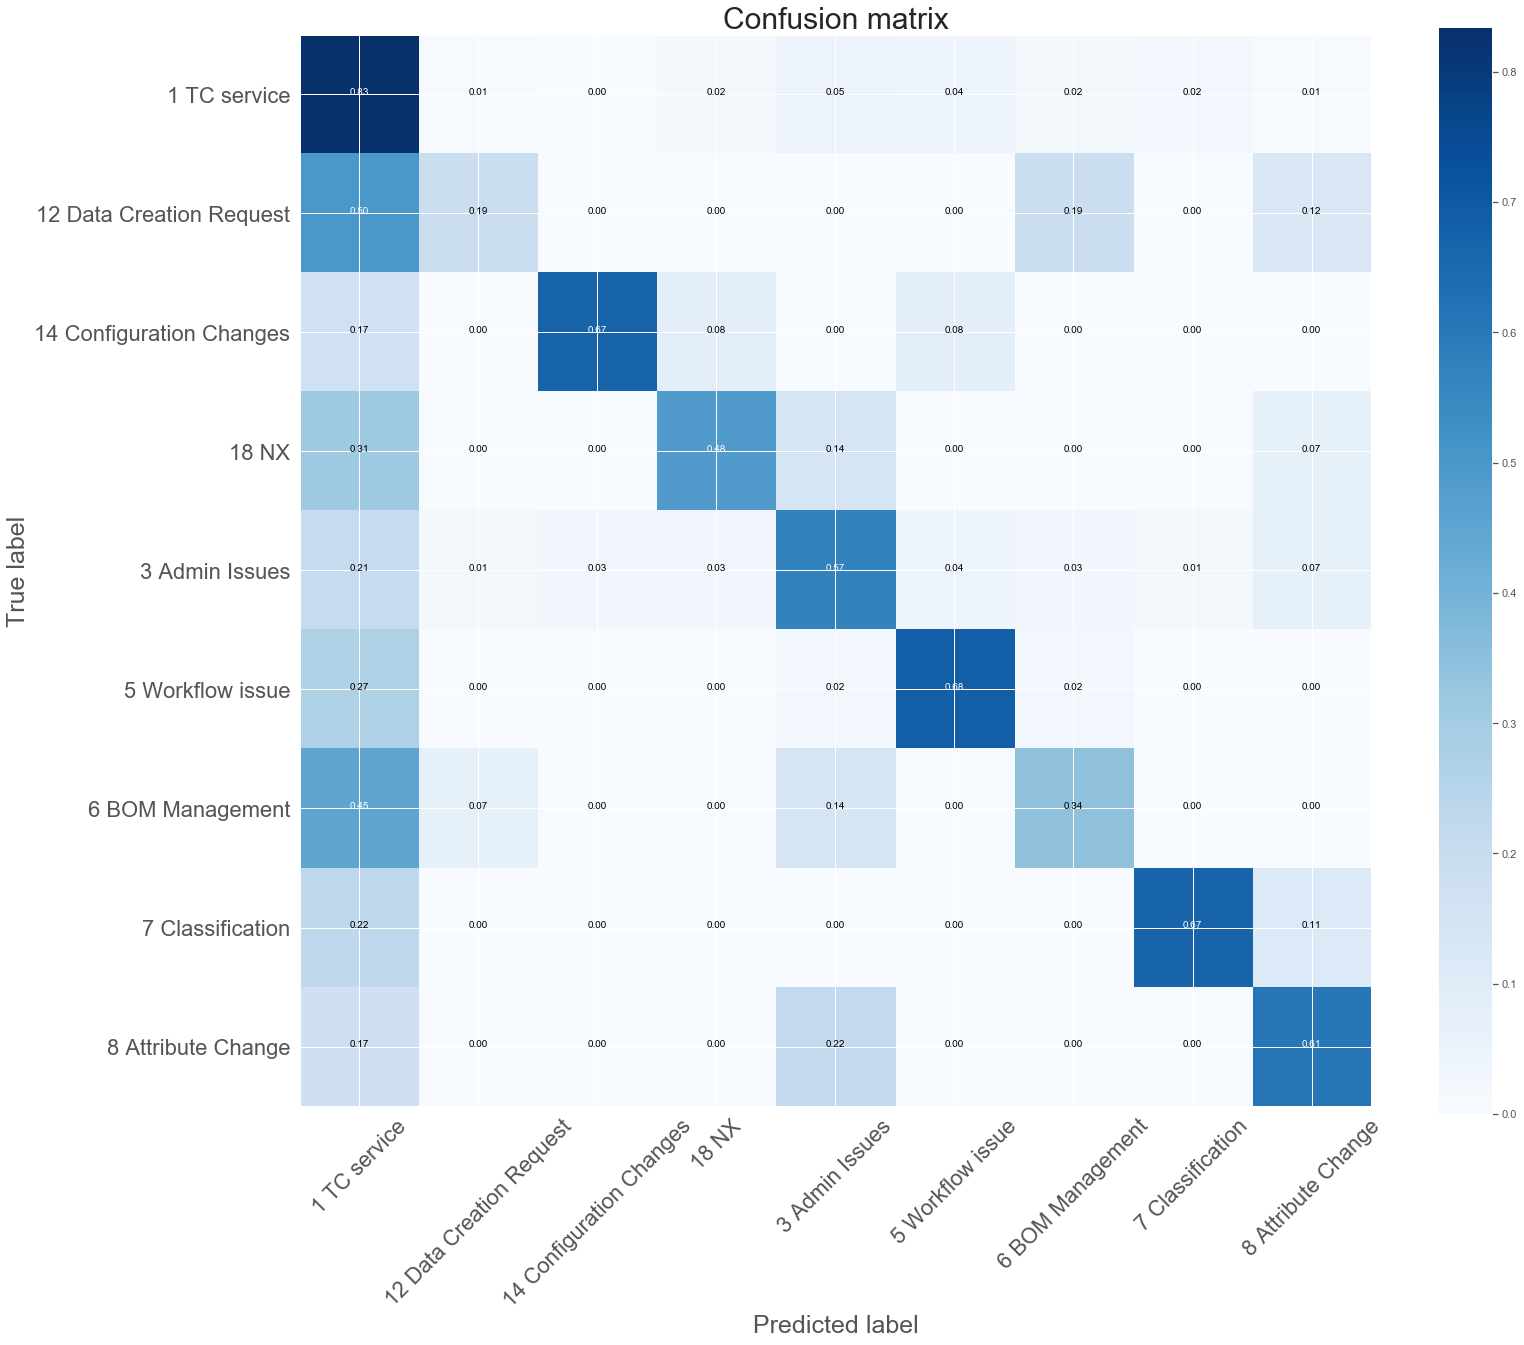

In [95]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

In [96]:
m=input("\nTitle")
n=input('\nDescription')
to_match=m+n


Titleappl

Descriptionss


In [97]:
df_low["final"].values

array([' hi please release material plant bom think already ok try release first redistribute plant bom work release material',
       ' hi please create cad model rud r eyebolt think possible download cad model page httpswwwrudcomenproductsslinglashingsystemsslingsystemsliftingpointsdetailrseyeboltmetricthreadhtml create cad part',
       ' user everything ok get issue also network problem seem occure anyway understand happen fw oppdateringupdate viktigurgent kort nedetid på teamcenter servershort downtime teamcenter server',
       ' comment let make simple contain little text possible still enough understand lopxxxxxtcocnreleaseprocessissueorgreviewdocx',
       ' tommy dale teamcenter assistant purchasing office week change laptop teamcenter setting ok print bom appreciate help teamcenter',
       ' able make tc bom report xcelfile appear empty try problem tcservicedesk help solve please look able make tc bom report',
       ' hi unfortunately day last month validfromdate update re

In [98]:

d={}
for i,j in zip(df_low['Sub-Category'],df_low['final']):
    if i not in d:
        d[i]=[j]
    else:
        d[i].append(j)
#print(d)
print(d)

{'13 Code Changes': [' hi please release material plant bom think already ok try release first redistribute plant bom work release material'], '17 TC FMS': [' hi please create cad model rud r eyebolt think possible download cad model page httpswwwrudcomenproductsslinglashingsystemsslingsystemsliftingpointsdetailrseyeboltmetricthreadhtml create cad part'], '22 Network': [' user everything ok get issue also network problem seem occure anyway understand happen fw oppdateringupdate viktigurgent kort nedetid på teamcenter servershort downtime teamcenter server'], '15 LOP CreateUpdate': [' comment let make simple contain little text possible still enough understand lopxxxxxtcocnreleaseprocessissueorgreviewdocx'], '20 ERP Report Issue': [' tommy dale teamcenter assistant purchasing office week change laptop teamcenter setting ok print bom appreciate help teamcenter', ' able make tc bom report xcelfile appear empty try problem tcservicedesk help solve please look able make tc bom report', ' hi

In [99]:
import numpy as np
def levenshtein_ratio_and_distance(s, t, ratio_calc = False):
    """ levenshtein_ratio_and_distance:
        Calculates levenshtein distance between two strings.
        If ratio_calc = True, the function computes the
        levenshtein distance ratio of similarity between two strings
        For all i and j, distance[i,j] will contain the Levenshtein
        distance between the first i characters of s and the
        first j characters of t
    """
    # Initialize matrix of zeros
    rows = len(s)+1
    cols = len(t)+1
    distance = np.zeros((rows,cols),dtype = int)

    # Populate matrix of zeros with the indeces of each character of both strings
    for i in range(1, rows):
        for k in range(1,cols):
            distance[i][0] = i
            distance[0][k] = k

    # Iterate over the matrix to compute the cost of deletions,insertions and/or substitutions    
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0 # If the characters are the same in the two strings in a given position [i,j] then the cost is 0
            else:
                # In order to align the results with those of the Python Levenshtein package, if we choose to calculate the ratio
                # the cost of a substitution is 2. If we calculate just distance, then the cost of a substitution is 1.
                if ratio_calc == True:
                    cost = 2
                else:
                    cost = 1
            distance[row][col] = min(distance[row-1][col] + 1,      # Cost of deletions
                                 distance[row][col-1] + 1,          # Cost of insertions
                                 distance[row-1][col-1] + cost)     # Cost of substitutions
    if ratio_calc == True:
        # Computation of the Levenshtein Distance Ratio
        Ratio = ((len(s)+len(t)) - distance[row][col]) / (len(s)+len(t))
        return Ratio
    else:
        # print(distance) # Uncomment if you want to see the matrix showing how the algorithm computes the cost of deletions,
        # insertions and/or substitutions
        # This is the minimum number of edits needed to convert string a to string b
        return "The strings are {} edits away".format(distance[row][col])

In [100]:
title=input("input Title")
description=input("Input description")
pred=description+title

input Titles
Input descriptions


In [101]:
def find_pred(inp):
    ma=0
    re=""
    for i in d:
        for j in  d[i]:
            k=levenshtein_ratio_and_distance(j,inp,ratio_calc = True)
            #print(k,i)
            if k>ma:
                ma=k
                re=i
                #print(ma,j)
    return re,ma

In [102]:
res,ma=find_pred(pred)
print(res,ma)

16 IPS Upload 0.12121212121212122


In [103]:
from fuzzywuzzy import process
str2Match = to_match
strOptions = df_low["final"]
Ratios = process.extract(str2Match,strOptions)
print(Ratios)
# You can also select the string with the highest matching percentage
highest = process.extractOne(str2Match,strOptions)
print(highest)

[(' please rename cxss rename cxss', 45, 172), (' ownership revision please ownership draw', 45, 112), (' try release issue bom fix release issue', 45, 1265), (' get error proceed error approval', 45, 1275), (' try approve get message error approve', 45, 1353)]
(' please rename cxss rename cxss', 45, 172)


C:\Users\Pratyush\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [104]:
strOptions

2728     hi please release material plant bom think al...
2354     hi please create cad model rud r eyebolt thin...
1815     user everything ok get issue also network pro...
887      comment let make simple contain little text p...
728      tommy dale teamcenter assistant purchasing of...
                              ...                        
1745     hi christian get mail angad release class soc...
1759     hi see procedure item create lot unwanted ite...
1779     hi please check get funky result check releas...
1927     hi get follow temporary issue try revise tc g...
2402     hi take look unwantedly classify raw material...
Name: final, Length: 173, dtype: object

# Extra Rough


In [105]:
for i in range(len(y_pred1)):
    #if y_pred1[i]!=y_test[i]:
     #   pass
        #print(y_pred1[i])
    if y_pred1[i]!="1 Teamcenter":
        print(y_pred1[i])

1 TC service
6 BOM Management
6 BOM Management
1 TC service
1 TC service
1 TC service
3 Admin Issues
6 BOM Management
1 TC service
1 TC service
3 Admin Issues
1 TC service
1 TC service
14 Configuration Changes
5 Workflow issue
6 BOM Management
1 TC service
1 TC service
8 Attribute Change
5 Workflow issue
3 Admin Issues
1 TC service
1 TC service
8 Attribute Change
1 TC service
3 Admin Issues
1 TC service
1 TC service
1 TC service
18 NX
1 TC service
1 TC service
1 TC service
1 TC service
1 TC service
1 TC service
8 Attribute Change
1 TC service
7 Classification
1 TC service
1 TC service
1 TC service
1 TC service
1 TC service
5 Workflow issue
1 TC service
6 BOM Management
1 TC service
1 TC service
8 Attribute Change
6 BOM Management
1 TC service
1 TC service
7 Classification
5 Workflow issue
3 Admin Issues
1 TC service
1 TC service
12 Data Creation Request
1 TC service
3 Admin Issues
8 Attribute Change
18 NX
1 TC service
6 BOM Management
1 TC service
5 Workflow issue
1 TC service
3 Admin 

In [106]:
df[df["Category"]!="1 Teamcenter"]

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution,text_final,desc_final,final
37,3,"[quick, release, error, message]","[rule, handler, dt4asserterpitemwithoutbom, find]",3 T4S,2 Installation,Closed,User able release,quick release error message,rule handler find,rule handler find quick release error message
41,11,"[please, get, items, release, send, sap]","[xsc1111000905, cxss00435463, cxss00705588, cx...",3 T4S,12 Data Creation Request,Closed,No Resolution,please get item release send sap,,please get item release send sap
60,33,"[ecn, preliminary, erp, issue]","[the, workflow, ecn, get, stop, sap, logon, sh...",3 T4S,9 Login,Closed,Restarted process go without error Please check,ecn preliminary erp issue,workflow ecn get stop sap logon show attach s...,workflow ecn get stop sap logon show attach s...
61,34,"[tc, quick, release, issue]","[rule, handler, t4svalidatesaplogon, find, ple...",3 T4S,9 Login,Closed,Item revision already release TC data present...,tc quick release issue,rule handler find please refer error snap sho...,rule handler find please refer error snap sho...
125,125,"[urgent, transfere, sap, tcmulti]","[item, number, 713230, need, transfer, sap, it...",3 T4S,1 TC service,Closed,We send item 713230 plant 180 also SAP Now it...,urgent transfere sap tcmulti,item number need transfer sap important get n...,item number need transfer sap important get n...
...,...,...,...,...,...,...,...,...,...,...
2345,2456,"[error, download, 3d, model, supplier]","[error, download, 3d, model, supplier]",2 NX,18 NX,Closed,Hi Trond As discuss I import step file C11110...,error download model supplier,error download model supplier,error download model supplier error download ...
2354,2465,"[create, cad, part, c1111041429]","[hi, can, please, create, cad, model, rud, m30...",2 NX,17 TC FMS,Closed,Hi John As request download 3D Step file prov...,create cad part,hi please create cad model rud r eyebolt thin...,hi please create cad model rud r eyebolt thin...
2355,2466,"[create, cad, part, c1111041430]","[hi, can, please, create, cad, model, standard...",2 NX,18 NX,Closed,Hi John As per discussion SKYP Based review a...,create cad part,hi please create cad model standard nut regul...,hi please create cad model standard nut regul...
2365,2476,"[g302125, dwg, update]","[hello, please, help, update, draw, we, try, a...",2 NX,18 NX,Closed,Hi Yes please put hold since seem fix I come ...,dwg update,hello please help update draw try available m...,hello please help update draw try available m...


In [107]:
sentences_test=["create cad part"]
s1 = sentences_test
vectorizer4 = CountVectorizer()
vectorizer4.fit(s1)
k5=vectorizer.transform(s1)
res3=clf2.predict(k5)
print(res3)

['14 Configuration Changes']


In [108]:
co = 0
for i,j in zip(res3, y_test):
    if i!=j:
        co+=1
        print(i)
print(len(res3),co)

14 Configuration Changes
1 1


C:\Users\Pratyush\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


In [109]:
Input=['erclassification quality improvement', 'erstep type dataset','quick release error message','error download 3d model supplier', 'please get these items released and sent to SAP']
vectorizer3 = CountVectorizer()
vectorizer3.fit(Input)
k3=vectorizer.transform(Input)
clf2.predict(k3)

array(['14 Configuration Changes', '14 Configuration Changes',
       '1 TC service', '1 TC service', '1 TC service'], dtype=object)

In [111]:
from sklearn import datasets
from xgboost import XGBClassifier
import pandas as pd
import numpy as np

In [113]:
xgb_model = XGBClassifier(n_estimators=5,
                          objective="binary:logistic", 
                          random_state=42)
xgb_model.fit(x_train, y_train)

y_prob = pd.DataFrame(xgb_model.predict_proba(X))[0] 

C:\Users\Pratyush\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


ValueError: y should be a 1d array, got an array of shape (2180, 9) instead.

In [115]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [110]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
svm3 = svm.SVC(kernel = 'linear')
print(cross_val_score(svm3,X,y, cv=10, scoring='accuracy').mean()*100)

ValueError: Found input variables with inconsistent numbers of samples: [2898, 2725]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=2, random_state=0)
print(cross_val_score(clf,X,y, cv=10, scoring='accuracy').mean()*100)

In [ ]:
from sklearn.model_selection import cross_val_score
classifier = LogisticRegression()
print(cross_val_score(classifier,X,y, cv=10, scoring='accuracy').mean()*100)

In [ ]:
from sklearn.model_selection import cross_val_score
Naive = naive_bayes.MultinomialNB()
print(cross_val_score(Naive,X,y, cv=10, scoring='accuracy').mean()*100)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knnClassifier = KNeighborsClassifier(n_neighbors=4)
knnClassifier.fit(X,y)
print(cross_val_score(knnClassifier,X,y, cv=10, scoring='accuracy').mean()*100)

In [ ]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def built_classifier():
    model = Sequential()
    #model.add(Embedding(max_words, embedding_size, input_length=X_train.shape[1]))
    #model.add(LSTM(100))
    #model.add(Flatten())
    model.add(Dense(5,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn = built_classifier, batch_size = 100, epochs = 5)
accuracies = cross_val_score(model, X = X_train, y = y_train, cv=5, n_jobs = -1)
accuracies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'RFC':94.85, 'LR':94.71, 'NB': 91.47,
		'SVM':94.61, 'LSTM' :0, 'KNN': 94.92}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (12,6))
fig.set_facecolor('grey')

# creating the bar plot
plt.bar(courses, values, color =['maroon', 'green', 'blue', 'yellow', 'cyan', 'purple'],
		width = 0.9, edgecolor = 'black')

plt.xlabel("Machine Learning Models")
plt.ylabel("Acuuracy in %")
plt.title("Accuracy")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = df['Title']
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(["create cad part"])
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(["create cad part"])
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
Xn = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

In [ ]:
arr={1:34,3:45,6:322}
arr.sort(key=lambda x:x[1])

In [ ]:
arr